##        GAME ON!
Utilização reinforcement learning no jogo Halite

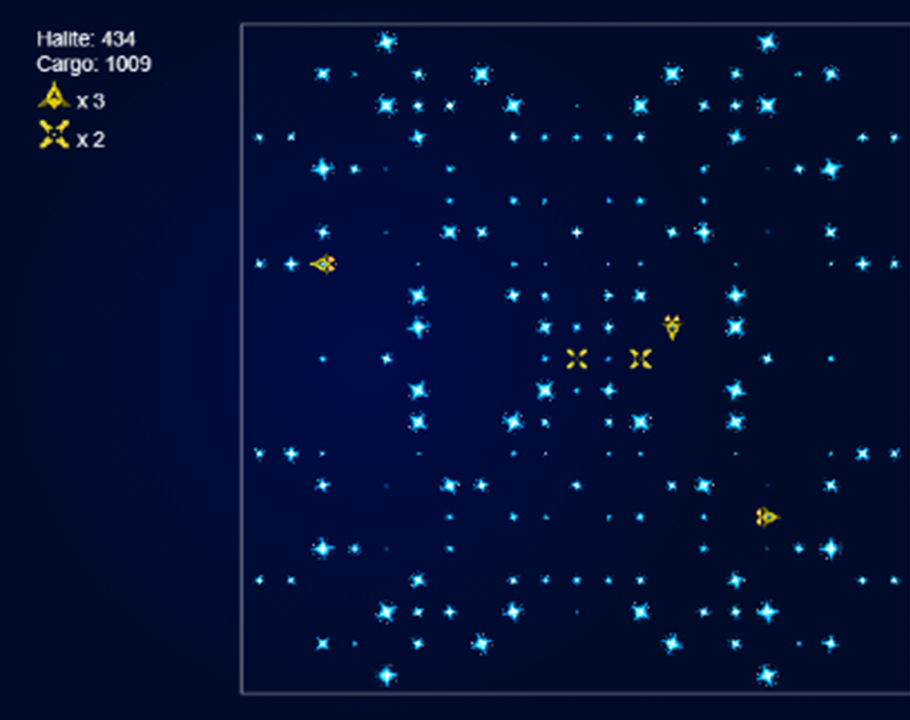

## Introdução
Neste modelo vamos projetar uma rede neural, simulando um jogo por meio de I.A. . O jogo do estudo é Halite feito por Two Sigma, e consiste consiste em gerenciamento de recursos onde você constrói e controla uma pequena armada de navios. Seus algoritmos determinam seus movimentos para coletar Halite, uma fonte de energia luminosa. 
O jogado com maior números de halite no final da partida vence, mas cabe a você descobrir como fazer movimentos eficazes e eficientes. 
Você controla sua frota, constrói novos navios, cria estaleiros e extrai a halita em regeneração no tabuleiro de jogo.
Estaríamos usando o agente Ator-Crítico, como nosso modelo básico de aprendizagem por reforço.
O objetivo do agente seria prever movimentos para controlar a direção do navio para coletar halita e depositá-los no estaleiro.


## Regras do jogo.
Jogado em um gridworld de 21 por 21 com duração de 400 passos de tempo. Cada jogador começa o jogo com 5.000 halites e uma nave.

As localizações da grade com halita são indicadas por um ícone azul claro, onde ícones maiores indicam mais halita disponível.

Os jogadores usam navios para navegar pelo mundo e coletar halite. Um navio só pode coletar halita de sua posição atual. Quando um navio decide coletar halita, ele coleta 25% da halita disponível em sua célula. Essa halita coletada é adicionada à "carga" do navio.


Halite na carga do navio não é contabilizada nas pontuações finais. Para que a halita seja contada, os navios precisam depositar sua carga em um estaleiro da mesma cor. Um navio pode depositar toda a sua carga em uma única etapa de tempo, simplesmente navegando até uma célula que contém um estaleiro.


Os jogadores começam o jogo sem estaleiros. Para conseguir um estaleiro, o jogador deve converter um navio em um estaleiro, que custa 500 halites. Além disso, os estaleiros podem gerar (ou criar) novos navios, o que deduz 500 halite (por navio) do jogador.

Duas naves não podem habitar com sucesso a mesma célula. Este evento resulta em uma colisão, onde:
O navio com mais halite em sua carga é destruído, e a outra nave sobrevive e recolhe instantaneamente a carga da nave destruída.

Se você visualizar as regras completas do jogo, notará que existem mais tipos de colisões que podem ocorrer no jogo (por exemplo, navios podem colidir com estaleiros inimigos, o que destrói o navio, a carga do navio e o estaleiro inimigo).

Em geral, Halite é um jogo complexo e não cobrimos todos os detalhes aqui. Mas mesmo com essas regras simplificadas, você pode imaginar que um jogador de sucesso terá que usar uma estratégia relativamente complicada.

## O que é Aprendizado por Reforço?
Aprendizado por Reforço é a ciência de tomar decisões ótimas usando a experiência. É categorizado como aprendizado supervisionado e aprendizado não supervisionado, em vez de categorizá-lo como aprendizado de máquina e aprendizado profundo. Aprendizagem por reforço é a metodologia que lida com a interação entre agente e ambiente por meio de ações e não tem nada a ver com dados rotulados e não rotulados, embora haja outra categoria chamada ** Aprendizagem semissupervisionada **, que na verdade é um híbrido de supervisionada e aprendizagem não supervisionada. 
A palavra "reforçar" significa fortalecer ou apoiar (um objeto ou substância), especialmente com material adicional.

Mas o que estamos fortalecendo aqui, e qual é o nosso apoio que fortalece? <br>
Estamos tentando fortalecer a capacidade de aprendizagem de um ** agente ** para entender o ambiente. Mas isso também acontece no aprendizado de máquina e aprendizado profundo, onde o modelo é treinado e aprende um padrão dos dados treinados, minimizando a perda e melhorando a precisão, outros modelos "clássicos" como KNN e árvore de decisão não se aplicam para o aprendizao por reforço. O fator que fortalece a capacidade de aprendizagem na aprendizagem por reforço é a ** Recompensa **. 
# Uma alta recompensa positiva é concedida ao agente por tomar uma decisão correta, e o agente deve ser penalizado por tomar uma decisão errada. O agente deve receber uma leve recompensa negativa por não tomar uma decisão correta após cada intervalo de tempo. "Ligeiro" negativo porque preferiríamos que nosso agente demorasse mais para tomar uma decisão do que tomar a decisão errada.<br>

Na aprendizagem por reforço, um ** Agente ** é um modelo de autoaprendizagem que aprende algum tipo de interação entre ele e o ambiente. O agente deseja atingir algum tipo de ** objetivo ** dentro do ambiente mencionado enquanto interage com ele. Essa interação é dividida em etapas de tempo. Em cada etapa de tempo, a ** ação ** é executada pelo agente. Esta ação muda o ** estado ** do ambiente e com base no sucesso dele o agente obtém uma certa ** recompensa **. Desta forma, o agente aprende quais ações devem ser realizadas e quais não devem ser em um estado de ambiente definido.

A cada passo de tempo, o agente executa uma ação no ambiente com base em sua política $ \ pi (a_t | s_t) $, onde $ s_t $ é a observação atual do ambiente, e recebe uma recompensa $ r_ {t + 1} $ e a próxima observação $ s_ {t + 1} $ do ambiente. O objetivo é aprimorar a política de forma a maximizar a soma das recompensas (retorno).
> uma política é a estratégia de um agente.

## O que é Q-learning?
Q-learning é um algoritmo de aprendizado por reforço sem modelo para aprender a qualidade das ações que dizem a um agente que ação tomar e em que circunstâncias. Ele não requer um modelo (daí a conotação "sem modelo") do ambiente e pode lidar com problemas com transições estocásticas e recompensas, sem exigir adaptações.
* Para qualquer processo de decisão de Markov finito (FMDP), o Q-learning encontra uma política ótima no sentido de maximizar o valor esperado da recompensa total em todas e quaisquer etapas sucessivas, começando do estado atual. [1] O Q-learning pode identificar uma política de seleção de ação ideal para qualquer FMDP dado, dado o tempo de exploração infinito e uma política parcialmente aleatória. [1] "Q" nomeia a função que o algoritmo calcula com as recompensas máximas esperadas para uma ação realizada em um determinado estado. 
Fonte: https://en.wikipedia.org/wiki/Q-learning

## O que é o agente ator-crítico?
No conceito de agente Ator-Crítico,é importante o conhecimento básico sobre Q-Learning, seguido de Q-Learning profundo, com isso entende-se melhor o agente crítico
<br>
Na classificação, <br>
Conforme um agente executa ações e se move através de um ambiente, ele aprende a mapear o estado observado do ambiente para duas saídas possíveis:
* Ação recomendada: um valor de probabilidade para cada ação no espaço de ação. A parte do agente responsável por esta saída é chamada de ** ator **.
* Recompensas estimadas no futuro: soma de todas as recompensas que espera receber no futuro. A parte do agente responsável por esta saída é o ** crítico **.

O agente e o crítico aprendem a realizar suas tarefas, de forma que as ações recomendadas do ator maximizem as recompensas. <br>
Fonte: [Keras.io] (https://keras.io/examples/rl/actor_critic_cartpole/)

## Implementação

In [ ]:
!pip install kaggle-environments --upgrade

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np # algebra linear
import pandas as pd # processamento de dados, CSV file I/O (e.g. pd.read_csv)
import os 
import sys
import PIL.Image

import tensorflow as tf
import logging

from sklearn import preprocessing
import random
import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import evaluate, make
from kaggle_environments.envs.halite.helpers import *


In [ ]:
seed=123
tf.compat.v1.set_random_seed(seed)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
logging.disable(sys.maxsize)
global ship_

## Analisando o cenário


In [ ]:
env = make("halite", debug=True) #Criando o ecosistema do jogo Halite
env.run(["random"])
env.render(mode="ipython",width=800, height=600)

In [ ]:
env.configuration #config do ecosistema

In [ ]:
env.specification #regras do jogo

In [ ]:
env.specification.reward #como é recompensado

In [ ]:
env.specification.action #quais são as ações

In [ ]:
env.specification.observation #especificações com tipos


## Que o jogo comece!
Treinando nosso modelo com relação às ações aleatórias e ver o resultado

In [ ]:
def getDirTo(fromPos, toPos, size): 
    fromX, fromY = divmod(fromPos[0],size), divmod(fromPos[1],size)
    toX, toY = divmod(toPos[0],size), divmod(toPos[1],size)
    if fromY < toY: return ShipAction.NORTH
    if fromY > toY: return ShipAction.SOUTH
    if fromX < toX: return ShipAction.EAST
    if fromX > toX: return ShipAction.WEST

# Direções do meu navio.
directions = [ShipAction.NORTH, ShipAction.EAST, ShipAction.SOUTH, ShipAction.WEST]

# Acompanhará se um navio está coletando halita ou transportando carga para um estaleiro
ship_states = {}

# Retorna os comandos que enviamos para nossos navios e estaleiros
def simple_agent(obs, config):
    size = config.size
    board = Board(obs, config)
    me = board.current_player
    # Se não houver navios, use o primeiro estaleiro para criar um navio.
    if len(me.ships) == 0 and len(me.shipyards) > 0:
        me.shipyards[0].next_action = ShipyardAction.SPAWN

    # Se não houver estaleiros, converta o primeiro navio em estaleiro.
    if len(me.shipyards) == 0 and len(me.ships) > 0:
        me.ships[0].next_action = ShipAction.CONVERT
    
    for ship in me.ships:
        if ship.next_action == None:
            
            ### Parte 1: Definir o estado do navio
            if ship.halite < 200: # Se a carga estiver muito baixa, colete halite
                ship_states[ship.id] = "COLLECT"
            if ship.halite > 500: # Se a carga ficar muito grande, deposite halita
                ship_states[ship.id] = "DEPOSIT"
                
            ### Parte 2: Use o estado do navio para selecionar uma ação
            if ship_states[ship.id] == "COLLECT":
                # Se halite na localização atual estiver acabando,
                # Mova para o quadrado adjacente que contém mais halita
                if ship.cell.halite < 100:
                    neighbors = [ship.cell.north.halite, ship.cell.east.halite, 
                                 ship.cell.south.halite, ship.cell.west.halite]
                    best = max(range(len(neighbors)), key=neighbors.__getitem__)
                    ship.next_action = directions[best]
            if ship_states[ship.id] == "DEPOSIT":
                # Mova-se em direção ao estaleiro para depositar a carga
                direction = getDirTo(ship.position, me.shipyards[0].position, size)
                if direction: ship.next_action = direction
                
    return me.next_actions

In [ ]:
trainer = env.train([None, "random"]) #Treinando o modelo baseado em pontos.
observation = trainer.reset()
while not env.done:
    my_action = simple_agent(observation, env.configuration)
    print("My Action", my_action)
    observation = trainer.step(my_action)[0]
    print("Reward gained",observation.players[0][0])

In [ ]:
env.render(mode="ipython",width=800, height=600) #Testando o modelo

## Objetivo

Nos resultados, os navios amarelos no lado esquerdo quase não mostra nenhum movimento, enquanto os navios vermelhos no lado direito mostram alguns movimentos inteligentes para coletar halita, depositá-los no estaleiro e gerar de acordo. Nosso objetivo seria treinar as naves amarelas por meio de aprendizagem por reforço e programar um modelo de IA que pudesse executar a tarefa dada da maneira mais eficiente possível.

## Os Obstáculos
Houve alguns problemas na utilização do aprendizado de reforço, devido ao nível de complexidade do jogo.
* Controlando apenas uma nave - O programa foi feito de forma que o agente só pudesse controlar uma nave por vez. O que de fato significa que o reaparecimento de várias naves fo idesativado
* Jogo de 5 movimentos - Devido ao primeiro problema o jogo foi limitado até a previsão de 4 direções (Leste, Oeste, Norte, Sul) e prever quando transformar de navio em estaleiro. O recurso SPAWN foi removido da previsão porque ainda não hóuve descoberta  de nenhuma maneira de controlar várias naves por meio do agente Ator-Crítico.
* Depósito no último estaleiro - Se não houvesse navio, o navio desovaria do mais recente estaleiro desenvolvido e depositaria halites no mais recente estaleiro desenvolvido. Teria sido melhor uma maneira de calcular o estaleiro mais próximo para a deposição dos halitos coletados.

 ## O modelo de ator crítico 

In [ ]:
def ActorModel(num_actions,in_): #O modelo de ator é um modelo matemático de computação simultânea que trata o ator como a primitiva universal. 
    #Fonte: https://en.wikipedia.org/wiki/Actor_model
    common = tf.keras.layers.Dense(128, activation='tanh')(in_)
    common = tf.keras.layers.Dense(32, activation='tanh')(common)
    common = tf.keras.layers.Dense(num_actions, activation='softmax')(common)
    
    return common

In [ ]:
def CriticModel(in_):
    common = tf.keras.layers.Dense(128)(in_)
    common = tf.keras.layers.ReLU()(common)
    common = tf.keras.layers.Dense(32)(common)
    common = tf.keras.layers.ReLU()(common)
    common = tf.keras.layers.Dense(1)(common)
    
    return common

In [ ]:
input_ = tf.keras.layers.Input(shape=[441,])
model = tf.keras.Model(inputs=input_, outputs=[ActorModel(5,input_),CriticModel(input_)])
model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=7e-4) 

In [ ]:
huber_loss = tf.keras.losses.Huber()
action_probs_history = []
critic_value_history = []
rewards_history = []
running_reward = 0
episode_count = 0
num_actions = 5
eps = np.finfo(np.float32).eps.item()
gamma = 0.99  # Fator de desconto para recompensas anteriores
env = make("halite", debug=True)
trainer = env.train([None,"random"])

## Codificando nossos movimentos

In [ ]:
le = preprocessing.LabelEncoder()
label_encoded = le.fit_transform(['NORTH', 'SOUTH', 'EAST', 'WEST', 'CONVERT'])
label_encoded

In [ ]:
def getDirTo(fromPos, toPos, size):
    fromX, fromY = divmod(fromPos[0],size), divmod(fromPos[1],size)
    toX, toY = divmod(toPos[0],size), divmod(toPos[1],size)
    if fromY < toY: return ShipAction.NORTH
    if fromY > toY: return ShipAction.SOUTH
    if fromX < toX: return ShipAction.EAST
    if fromX > toX: return ShipAction.WEST

# Direções que um navio pode mover
directions = [ShipAction.NORTH, ShipAction.EAST, ShipAction.SOUTH, ShipAction.WEST]
   
def decodeDir(act_):
    if act_ == 'NORTH':return directions[0]
    if act_ == 'EAST':return directions[1]
    if act_ == 'SOUTH':return directions[2]
    if act_ == 'WEST':return directions[3]
    
# Acompanhará se um navio está coletando halita ou transportando carga para um estaleiro
ship_states = {}
ship_ = 0
def update_L1():
    ship_+=1
# Retorna os comandos que enviamos para nossos navios e estaleiros
def advanced_agent(obs, config, action):
    size = config.size
    board = Board(obs, config)
    me = board.current_player 
    act = le.inverse_transform([action])[0]
    global ship_
    
   # Se não houver navios, use o primeiro estaleiro para gerar um navio.
    if len(me.ships) == 0 and len(me.shipyards) > 0:
        me.shipyards[ship_-1].next_action = ShipyardAction.SPAWN

    # Se não houver estaleiros, converta o primeiro navio em estaleiro.
    if len(me.shipyards) == 0 and len(me.ships) > 0 and ship_==0:
        me.ships[0].next_action = ShipAction.CONVERT   
    try: 
        if act=='CONVERT':
            me.ships[0].next_action = ShipAction.CONVERT
            update_L1()
            if len(me.ships)==0 and len(me.shipyards) > 0:
                me.shipyards[ship_-1].next_action = ShipyardAction.SPAWN
        if me.ships[0].halite < 200:
            ship_states[me.ships[0].id] = 'COLLECT'
        if me.ships[0].halite > 800:
            ship_states[me.ships[0].id] = 'DEPOSIT' 

        if ship_states[me.ships[0].id] == 'COLLECT': 
            if me.ships[0].cell.halite < 100:
                me.ships[0].next_action = decodeDir(act)
        if ship_states[me.ships[0].id] == 'DEPOSIT':
            # Mova-se em direção ao estaleiro para depositar a carga
            direction = getDirTo(me.ships[0].position, me.shipyards[ship_-1].position, size)
            if direction: me.ships[0].next_action = direction
    except:
        pass
                
    return me.next_actions

In [ ]:
while not env.done:    
    state = trainer.reset()
    episode_reward = 0
    with tf.GradientTape() as tape:
        for timestep in range(1,env.configuration.episodeSteps+200):
            # do agente em uma janela pop-up.
            state_ = tf.convert_to_tensor(state.halite)
            state_ = tf.expand_dims(state_, 0)
            # Prever probabilidades de ação e estimar recompensas futuras
            # do estado do meio ambiente
            action_probs, critic_value = model(state_)
            critic_value_history.append(critic_value[0, 0])
            
            # Amostra de ação da distribuição de probabilidade de ação
            action = np.random.choice(num_actions, p=np.squeeze(action_probs))
            action_probs_history.append(tf.math.log(action_probs[0, action]))
            
            # Aplicando a ação de amostra em nosso ambiente
            action = advanced_agent(state, env.configuration, action)
            state = trainer.step(action)[0]
            gain=state.players[0][0]/5000
            rewards_history.append(gain)
            episode_reward += gain
            
            if env.done:
                state = trainer.reset() 
        # Atualizar a recompensa em execução para verificar a condição de solução
        running_reward = 0.05 * episode_reward + (1 - 0.05) * running_reward

        # Calcule o valor esperado das recompensas
         # - Em cada etapa de tempo, qual foi a recompensa total recebida após essa etapa de tempo
         # - Recompensas no passado são descontadas multiplicando-as por gama
         # - Estes são os rótulos do nosso crítico
        returns = []
        discounted_sum = 0
        for r in rewards_history[::-1]:
            discounted_sum = r + gamma * discounted_sum
            returns.insert(0, discounted_sum)
        # Normalizar
        returns = np.array(returns)
        returns = (returns - np.mean(returns)) / (np.std(returns) + eps)
        returns = returns.tolist()
        # Calculando valores de perda para atualizar nossa rede
        history = zip(action_probs_history, critic_value_history, returns)
        actor_losses = []
        critic_losses = []
        for log_prob, value, ret in history:
            # Neste ponto da história, o crítico estimou que obteríamos uma
            # recompensa total = `valor` no futuro. Tomamos uma ação com log de probabilidade
            # de `log_prob` e acabou recebendo uma recompensa total =` ret`.
            # O ator deve ser atualizado para que preveja uma ação que leva a
            # altas recompensas (em comparação com a estimativa do crítico) com alta probabilidade.
            diff = ret - value
            actor_losses.append(-log_prob * diff)  # perda de ator

            # O crítico deve ser atualizado para que preveja uma melhor estimativa de
            # as recompensas futuras.
            critic_losses.append(
                huber_loss(tf.expand_dims(value, 0), tf.expand_dims(ret, 0))
            )
        # Retropropagação
        loss_value = sum(actor_losses) + sum(critic_losses)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        # Limpa o histórico de perdas e recompensas
        action_probs_history.clear()
        critic_value_history.clear()
        rewards_history.clear()
        
    # Detalhes de registro
    episode_count += 1
    if episode_count % 10 == 0:
        template = "running reward: {:.2f} at episode {}"
        print(template.format(running_reward, episode_count))

    if running_reward > 550:  # Condição para considerar a tarefa resolvida
        print("Solved at episode {}!".format(episode_count))
        break

In [ ]:
while not env.done:
    state_ = tf.convert_to_tensor(state.halite)
    state_ = tf.expand_dims(state_, 0)
    action_probs, critic_value = model(state_)
    critic_value_history.append(critic_value[0, 0])
    action = np.random.choice(num_actions, p=np.squeeze(action_probs))
    action_probs_history.append(tf.math.log(action_probs[0, action]))
    action = advanced_agent(state, env.configuration, action)
    state = trainer.step(action)[0]

## Resultado
Os navios e estaleiros amarelos são controlados por nosso modelo ator-crítico treinado e os navios e estaleiros vermelhos são treinados contra o agente de previsão aleatória.

In [ ]:
env.render(mode="ipython",width=800, height=600)

## Conclusão
<br><br>
O navio está coletando halites, transformando-se em estaleiros e também desovando, o navio está disponível de forma eficiente. Portanto, treinamos com sucesso nosso agente para direcionar o navio para coletar halites da maneira mais eficiente possível. O autor entende da necessidade de melhoria do modelo, por exemplo encontrar uma maneira de rastrear o estaleiro mais próximo e os depósitos de halites coletados ou encontrar uma maneira de controlar vários agentes por meio do aprendizado por reforço. Embora existam trabalhos de pesquisa explicando o aprendizado de Multi-Reforço e o aprendizado de Multi-objetivo por Reforço, que podem ser mais úteis para resolver esse problema.


## Obrigado! 
fonte: https://www.kaggle.com/basu369victor/designing-game-ai-with-reinforcement-learning
